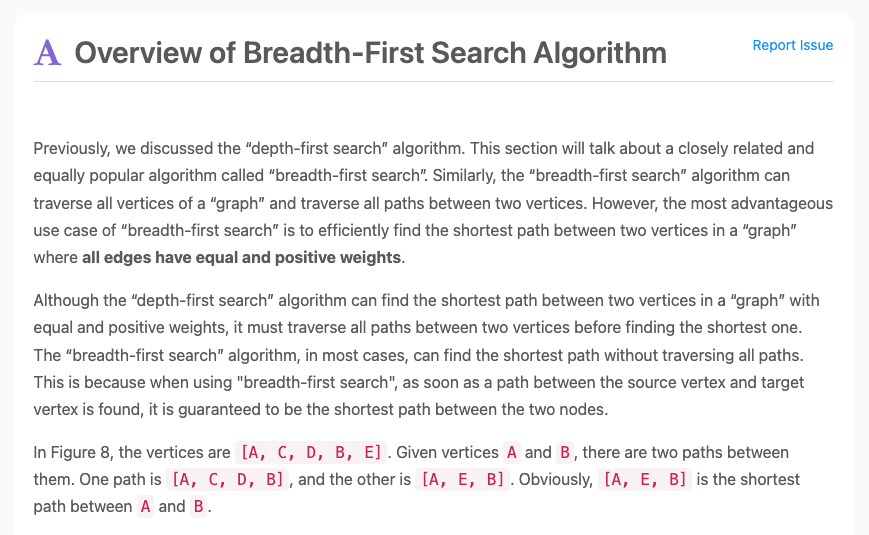

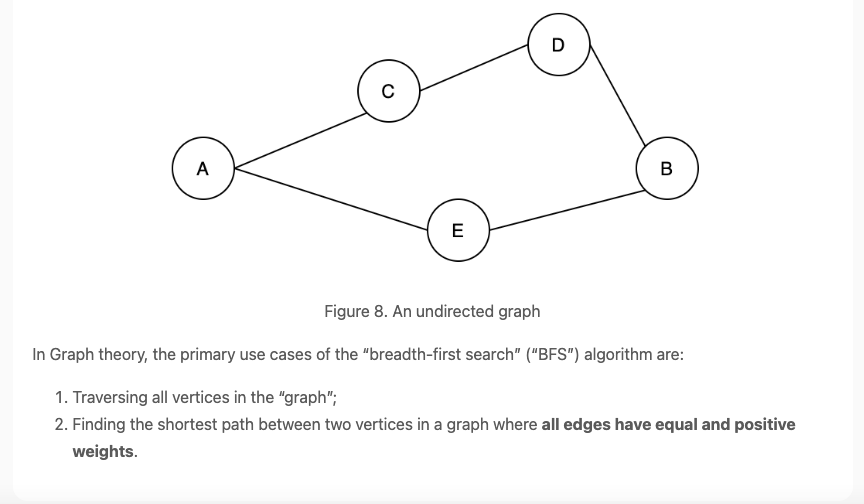

In [1]:
#  Traversing all Vertices - Breadth-First Search

#  Traversing all Vertices - Breadth-First Search

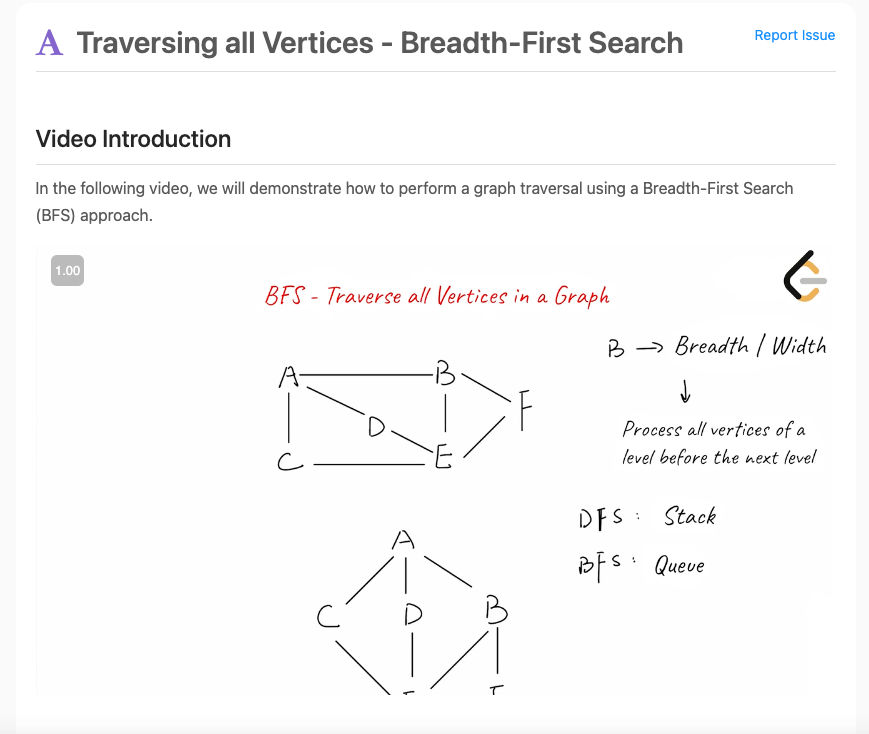

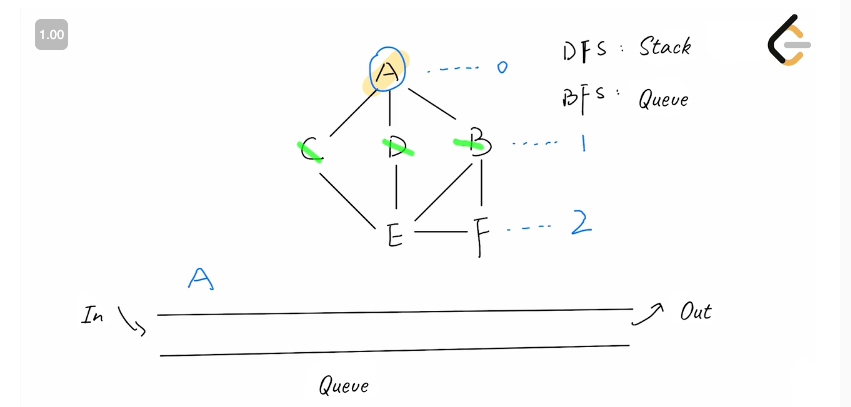

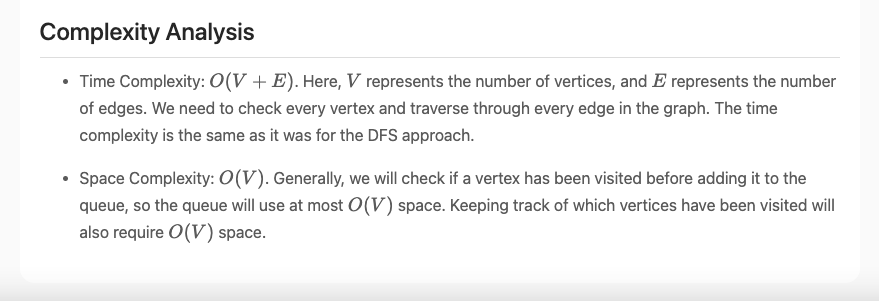

In [ ]:
# Shortest Path Between Two Vertices - Breadth-First Search

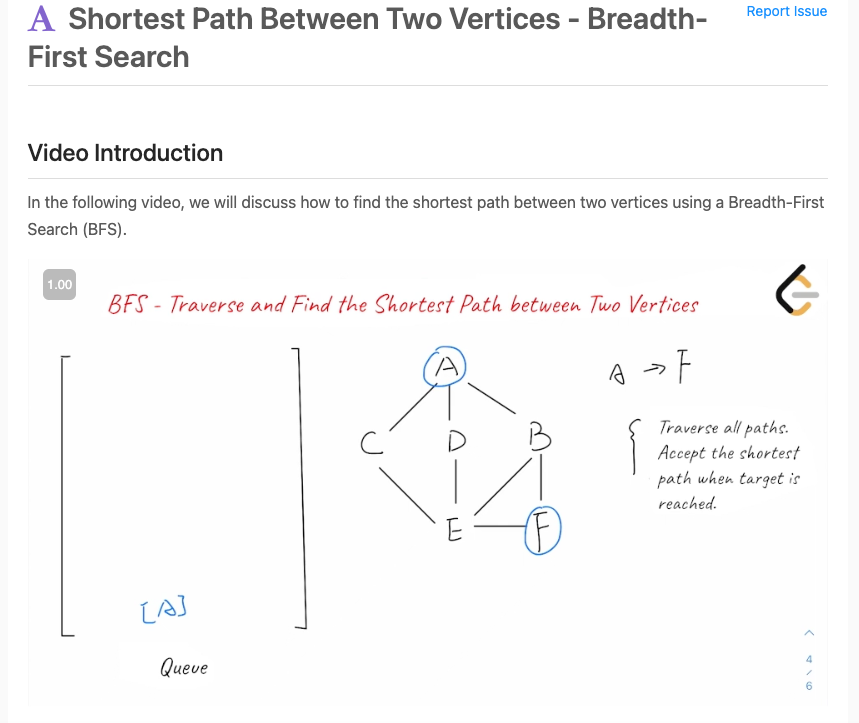

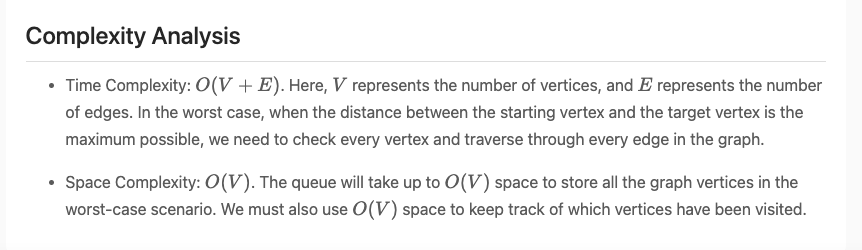

In [ ]:
#  Find if Path Exists in Graph

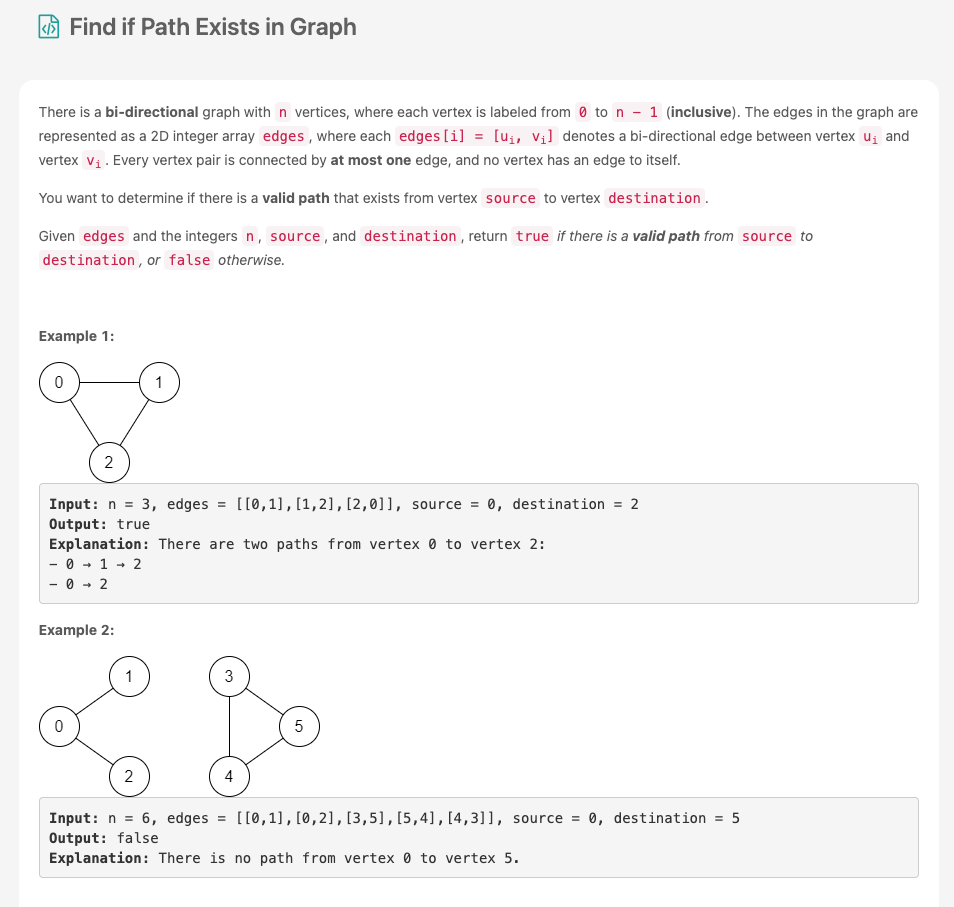

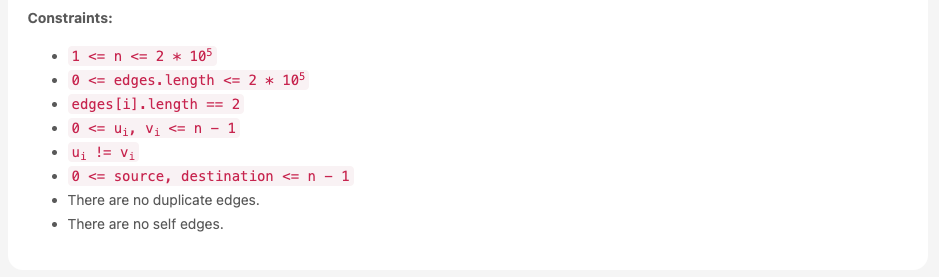

In [ ]:
# BFS
class Solution:
    def validPath(self, n: int, edges: List[List[int]], start: int, end: int) -> bool:
        
        adjacency_list = [[] for _ in range(n)]
        for a, b in edges:
            adjacency_list[a].append(b)
            adjacency_list[b].append(a)
        
        queue = collections.deque([start])
        seen = set([start])
        
        while queue:
            # Get the current node.
            node = queue.popleft()
            
            # Check if we have reached the target node.
            if node == end:
                return True
            
            # Add all neighbors to the queue.
            for neighbor in adjacency_list[node]:
                # Check if neighbor has been added to the queue before.
                if neighbor not in seen:
                    seen.add(neighbor)
                    queue.append(neighbor)
        
        # Our queue is empty and we did not reach the end node.
        return False

In [ ]:
# All Paths From Source to Target

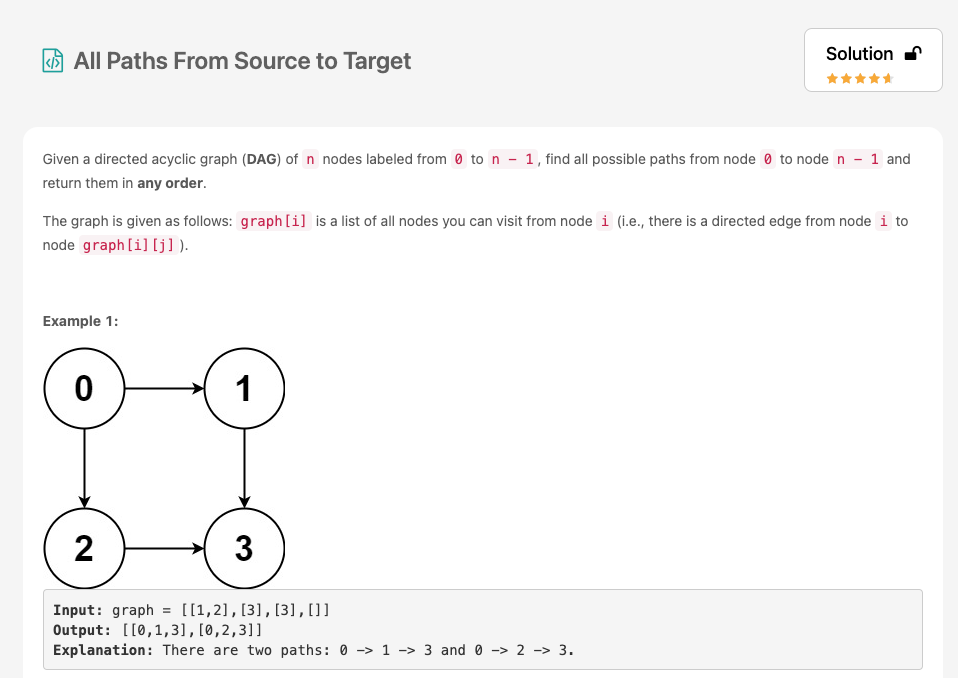

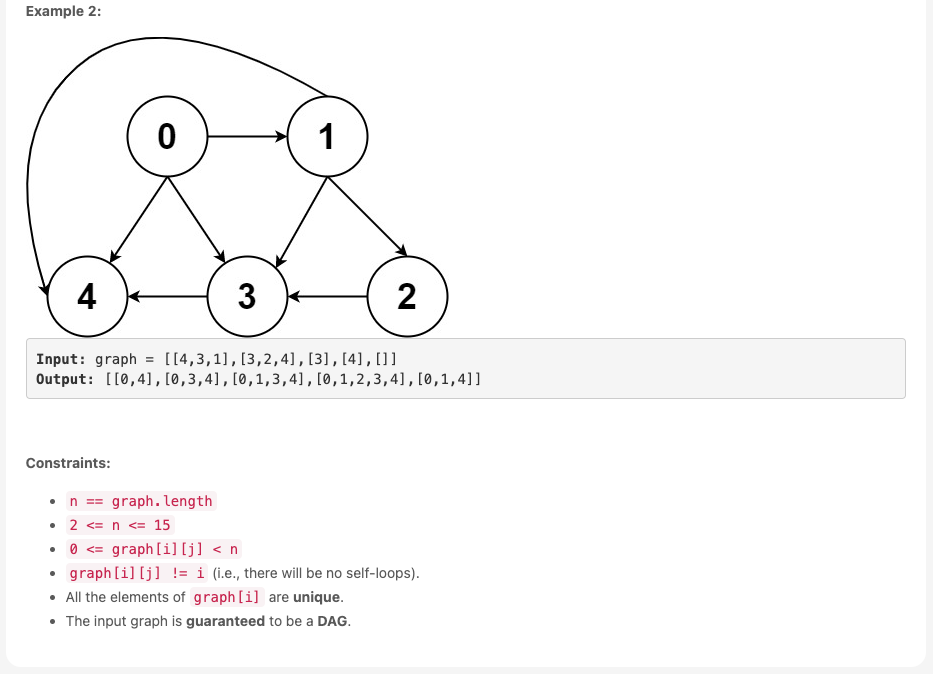

In [ ]:
class Solution:
    def allPathsSourceTarget(self, graph: List[List[int]]) -> List[List[int]]:

        target = len(graph) - 1
        results = []

        def backtrack(currNode, path):
            # if we reach the target, no need to explore further.
            if currNode == target:
                results.append(list(path))
                return
            # explore the neighbor nodes one after another.
            for nextNode in graph[currNode]:
                path.append(nextNode)
                backtrack(nextNode, path)
                path.pop()
        # kick of the backtracking, starting from the source node (0).
        path = deque([0])
        backtrack(0, path)

        return results

In [ ]:
# Populating Next Right Pointers in Each Node

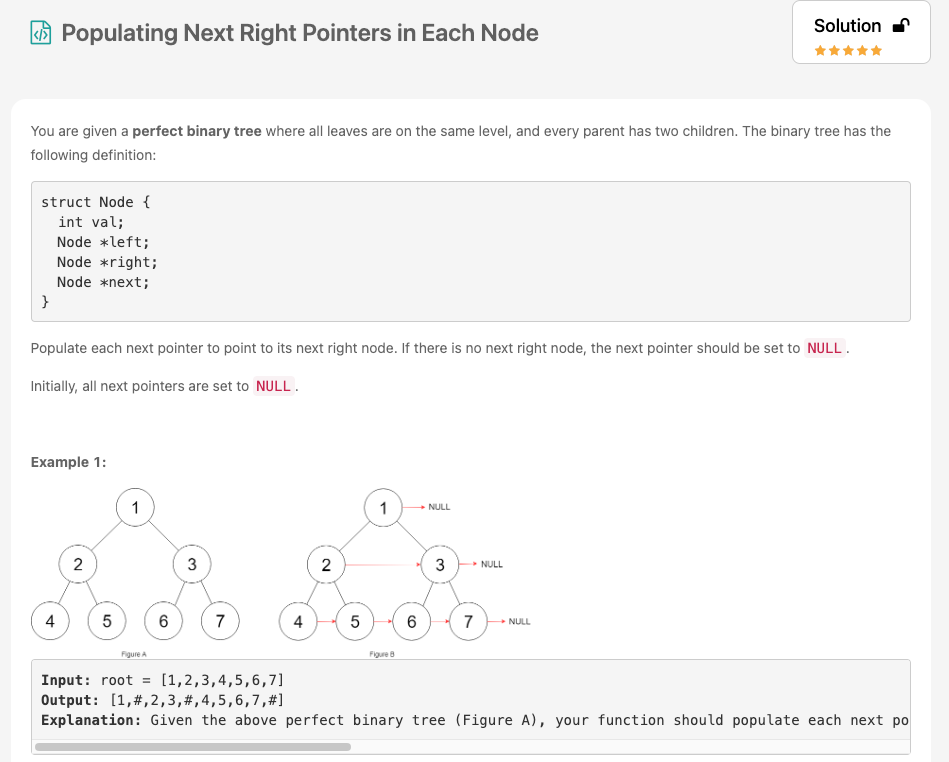

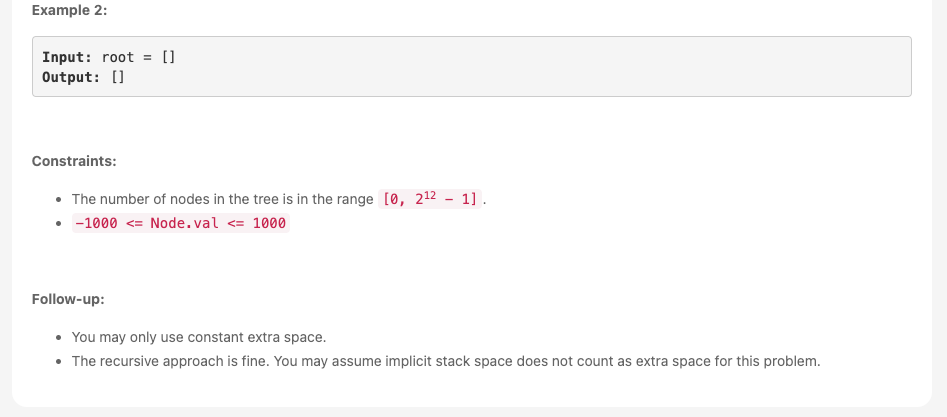

In [ ]:
# Accepted v1  queue + base queue
"""
# Definition for a Node.
class Node:
    def __init__(self, val: int = 0, left: 'Node' = None, right: 'Node' = None, next: 'Node' = None):
        self.val = val
        self.left = left
        self.right = right
        self.next = next
"""

class Solution:
    def connect(self, root: 'Optional[Node]') -> 'Optional[Node]':
        if not root:
            return root
        
        q = deque([root,])
        qb = deque()
        while q or qb:
            while q:
                cur = q.popleft()
                if q:
                    cur.next = q[0]
                else:
                    cur.next = None
                if cur.left:
                    qb.append(cur.left)
                if cur.right:
                    qb.append(cur.right)
            q = qb
            qb = deque()
        return root
    

In [ ]:
# Approach 1: Level Order Traversal   在初始的时候设置一个限定的小循环也可以
import collections 

class Solution:
    def connect(self, root: 'Node') -> 'Node':
        
        if not root:
            return root
        
        # Initialize a queue data structure which contains
        # just the root of the tree
        Q = collections.deque([root])
        
        # Outer while loop which iterates over 
        # each level
        while Q:
            
            # Note the size of the queue
            size = len(Q)
            
            # Iterate over all the nodes on the current level
            for i in range(size):
                
                # Pop a node from the front of the queue
                node = Q.popleft()
                
                # This check is important. We don't want to
                # establish any wrong connections. The queue will
                # contain nodes from 2 levels at most at any
                # point in time. This check ensures we only 
                # don't establish next pointers beyond the end
                # of a level
                if i < size - 1:
                    node.next = Q[0]
                
                # Add the children, if any, to the back of
                # the queue
                if node.left:
                    Q.append(node.left)
                if node.right:
                    Q.append(node.right)
        
        # Since the tree has now been modified, return the root node
        return root
                         

In [ ]:
# Approach 2: Using previously established next pointers
class Solution:
    def connect(self, root: 'Node') -> 'Node':
        
        if not root:
            return root
        
        # Start with the root node. There are no next pointers
        # that need to be set up on the first level
        leftmost = root
        
        # Once we reach the final level, we are done
        while leftmost.left:
            
            # Iterate the "linked list" starting from the head
            # node and using the next pointers, establish the 
            # corresponding links for the next level
            head = leftmost
            while head:
                
                # CONNECTION 1
                head.left.next = head.right
                
                # CONNECTION 2
                if head.next:
                    head.right.next = head.next.left
                
                # Progress along the list (nodes on the current level)
                head = head.next
            
            # Move onto the next level
            leftmost = leftmost.left
        
        return root 

In [ ]:
# Shortest Path in Binary Matrix

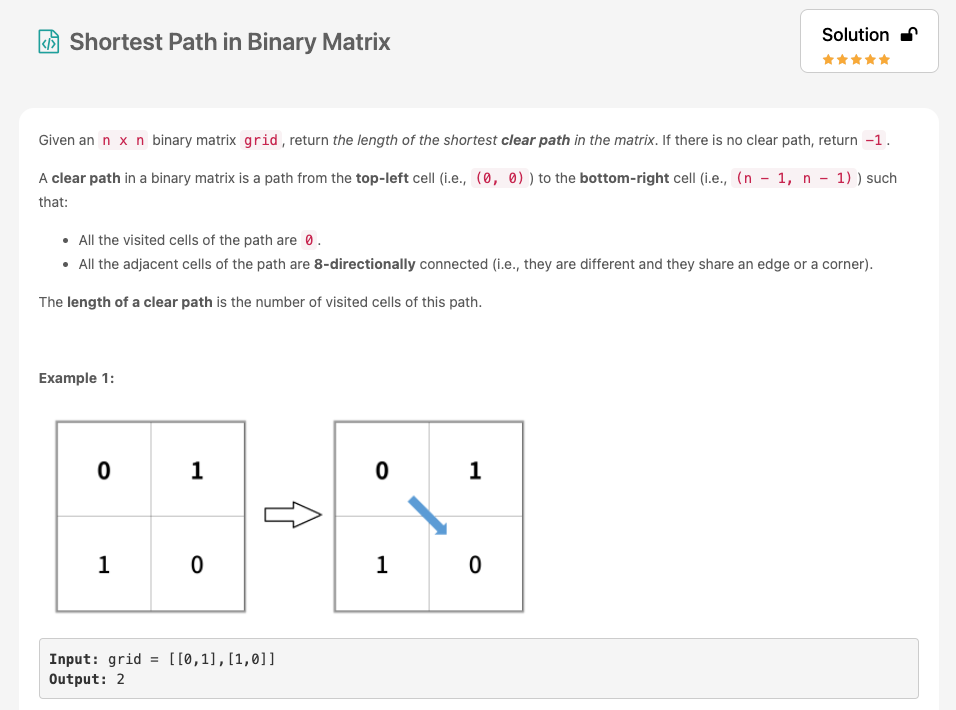

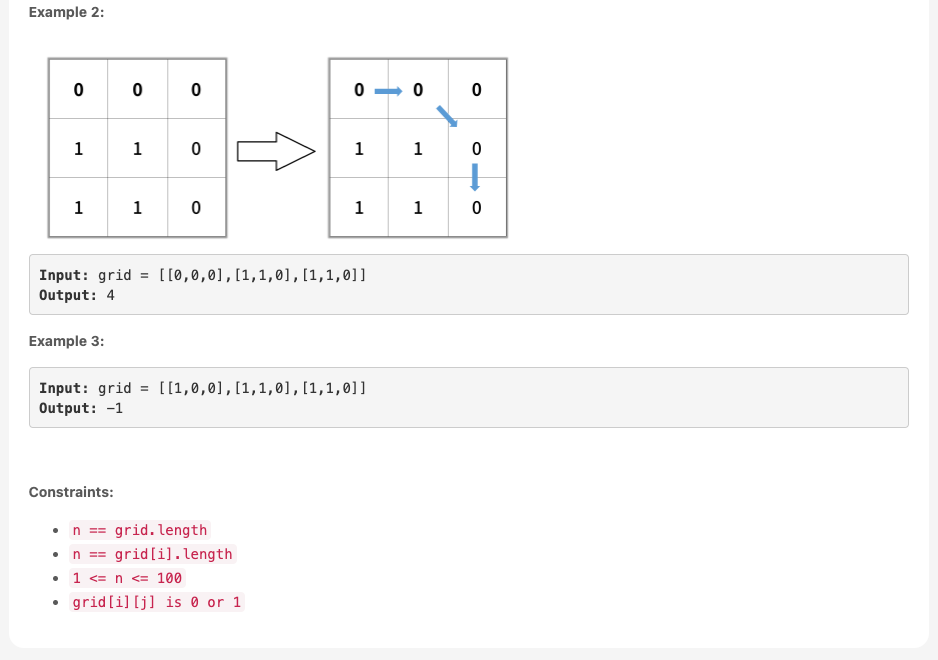

In [ ]:
# Failed v1
class Solution:
    def shortestPathBinaryMatrix(self, grid: List[List[int]]) -> int:

        
        def checkAround(i,j,n):
            result = []
            if i-1>=0:
                result.append((i-1,j))

                if j-1>=0: 
                    result.append((i-1,j-1))
                if j+1<n: 
                    result.append((i-1,j+1))
                    
            if i+1< n:
                result.append((i+1,j))
                
                if j-1>=0: 
                    result.append((i+1,j-1))
                if j+1<n: 
                    result.append((i+1,j+1))
                    
            if j-1>=0:
                result.append((i,j-1))
            if j+1<n:
                result.append((i,j+1))
                    
            return result
        

        edge_mapping = {}
        edge_mapping_reverse = {}
        count=0
        n = len(grid)
        for i in range(n):
            for j in range(n):
                if grid[i][j]==0:
                    edge_mapping[count] = (i,j)
                    edge_mapping_reverse[(i,j)] = count
                    count+=1
                    
        # print(edge_mapping)
                    
        edges = []
        n = len(grid)
        for i in range(n):
            for j in range(n):
                cur = grid[i][j]
                if cur!=0:
                    continue
                else:
                    print('(i,j):',(i,j))
                    i1 = edge_mapping_reverse[(i,j)]
                    # print("CheckAround:",checkAround(i,j,n))
                    for x,y in checkAround(i,j,n):
                        if grid[x][y]==0:
                            print('Check Around:',(x,y))
                            i2 = edge_mapping_reverse[(x,y)]
                            edges.append((i1,i2))
        
        tmp = len(edge_mapping)
        adjacency_list = [[] for _ in range(tmp)]
        # print(edges)
        # print(tmp)
        edges = list(set([tuple(sorted(x)) for x in edges]))
        
        for a, b in edges:
            adjacency_list[a].append(b)
            adjacency_list[b].append(a)
        
        print('edges:',edges)
        graph = adjacency_list
        
        print("Graph:",graph)
        
        target = len(graph) - 1
        results = []
        def backtrack(currNode, path):
            # if we reach the target, no need to explore further.
            if currNode == target:
                results.append(list(path))
                return
            # explore the neighbor nodes one after another.
            for nextNode in graph[currNode]:
                path.append(nextNode)
                backtrack(nextNode, path)
                path.pop()
        # kick of the backtracking, starting from the source node (0).
        path = deque([0])
        backtrack(0, path)

        # print(results) 
        
        # Our queue is empty and we did not reach the end node.
        return min([len(x) for x in results])

In [ ]:
# Accepted v1
class Solution:
    def shortestPathBinaryMatrix(self, grid: List[List[int]]) -> int:
        if not grid:
            return -1
        if grid[0][0]!=0:
            return -1
        if grid[-1][-1]!=0:
            return -1
        
        def checkAround(i,j,n):
            result = []
            if i-1>=0:
                result.append((i-1,j))

                if j-1>=0: 
                    result.append((i-1,j-1))
                if j+1<n: 
                    result.append((i-1,j+1))
                    
            if i+1< n:
                result.append((i+1,j))
                
                if j-1>=0: 
                    result.append((i+1,j-1))
                if j+1<n: 
                    result.append((i+1,j+1))
                    
            if j-1>=0:
                result.append((i,j-1))
            if j+1<n:
                result.append((i,j+1))
                    
            return result
        

        edge_mapping = {}
        edge_mapping_reverse = {}
        count=0
        n = len(grid)
        for i in range(n):
            for j in range(n):
                if grid[i][j]==0:
                    edge_mapping[count] = (i,j)
                    edge_mapping_reverse[(i,j)] = count
                    count+=1
                    
        # print(edge_mapping)
                    
        edges = []
        n = len(grid)
        for i in range(n):
            for j in range(n):
                cur = grid[i][j]
                if cur!=0:
                    continue
                else:
                    # print('(i,j):',(i,j))
                    i1 = edge_mapping_reverse[(i,j)]
                    # print("CheckAround:",checkAround(i,j,n))
                    for x,y in checkAround(i,j,n):
                        if grid[x][y]==0:
                            # print('Check Around:',(x,y))
                            i2 = edge_mapping_reverse[(x,y)]
                            edges.append((i1,i2))
        
        tmp = len(edge_mapping)
        adjacency_list = [[] for _ in range(tmp)]
        # print(edges)
        # print(tmp)
        edges = list(set([tuple(sorted(x)) for x in edges]))
        
        for a, b in edges:
            adjacency_list[a].append(b)
            adjacency_list[b].append(a)
        
        # print('edges:',edges)
        graph = adjacency_list
        
        # print("Graph:",graph)
        
        start=0
        end = len(graph)-1
        queue = collections.deque([start])
        seen = set([start])
        
        count = 0
        while queue:
            
            n = len(queue)
            count+=1
            for i in range(n):
                # Get the current node.
                node = queue.popleft()
                
                # Check if we have reached the target node.
                if node == end:
                    return count

                # Add all neighbors to the queue.
                for neighbor in adjacency_list[node]:
                    # Check if neighbor has been added to the queue before.
                    if neighbor not in seen:
                        seen.add(neighbor)
                        queue.append(neighbor)
        

        # Our queue is empty and we did not reach the end node.
        return -1

### Solutions

In [ ]:
# Approach 1: Breadth-first Search (BFS), Overwriting Input
class Solution:
    def shortestPathBinaryMatrix(self, grid: List[List[int]]) -> int:
        
        max_row = len(grid) - 1
        max_col = len(grid[0]) - 1
        directions = [
            (-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]
        
        # Helper function to find the neighbors of a given cell.
        def get_neighbours(row, col):
            for row_difference, col_difference in directions:
                new_row = row + row_difference
                new_col = col + col_difference
                if not(0 <= new_row <= max_row and 0 <= new_col <= max_col):
                    continue
                if grid[new_row][new_col] != 0:
                    continue
                yield (new_row, new_col)
        
        # Check that the first and last cells are open. 
        if grid[0][0] != 0 or grid[max_row][max_col] != 0:
            return -1
        
        # Set up the BFS.
        queue = deque()
        queue.append((0, 0))
        grid[0][0] = 1 
        
        # Carry out the BFS.
        while queue:
            row, col = queue.popleft()
            distance = grid[row][col]
            if (row, col) == (max_row, max_col):
                return distance
            for neighbour_row, neighbour_col in get_neighbours(row, col):
                grid[neighbour_row][neighbour_col] = distance + 1
                queue.append((neighbour_row, neighbour_col))
        
        # There was no path.
        return -1

In [ ]:
# Approach 2: Breadth-first Search (Without Overwriting the Input)
class Solution:
    def shortestPathBinaryMatrix(self, grid: List[List[int]]) -> int:
        
        max_row = len(grid) - 1
        max_col = len(grid[0]) - 1
        directions = [
            (-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]
        
        # Helper function to find the neighbors of a given cell.
        def get_neighbours(row, col):
            for row_difference, col_difference in directions:
                new_row = row + row_difference
                new_col = col + col_difference
                if not(0 <= new_row <= max_row and 0 <= new_col <= max_col):
                    continue
                if grid[new_row][new_col] != 0:
                    continue
                yield (new_row, new_col)
        
        # Check that the first and last cells are open. 
        if grid[0][0] != 0 or grid[max_row][max_col] != 0:
            return -1
        
        # Set up the BFS.
        queue = deque([(0, 0, 1)])
        visited = {(0, 0)}
        
        # Do the BFS.
        while queue:
            row, col, distance = queue.popleft()
            if (row, col) == (max_row, max_col):
                return distance
            for neighbour in get_neighbours(row, col):
                if neighbour in visited:
                    continue
                visited.add(neighbour)
                # Note that the * splits neighbour into its values.
                queue.append((*neighbour, distance + 1))
                
        # There was no path.
        return -1

In [ ]:
# Starting a new collection for each distance
class Solution:
    def shortestPathBinaryMatrix(self, grid: List[List[int]]) -> int:
        
        max_row = len(grid) - 1
        max_col = len(grid[0]) - 1
        directions = [
            (-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]
        
        # Helper function to find the neighbors of a given cell.
        def get_neighbours(row, col):
            for row_difference, col_difference in directions:
                new_row = row + row_difference
                new_col = col + col_difference
                if not(0 <= new_row <= max_row and 0 <= new_col <= max_col):
                    continue
                if grid[new_row][new_col] != 0:
                    continue
                yield (new_row, new_col)
        
        # Check that the first and last cells are open. 
        if grid[0][0] != 0 or grid[max_row][max_col] != 0:
            return -1
        
        # Set up the BFS.
        current_layer = [(0, 0)]
        next_layer = []
        visited = {(0, 0)}
        current_distance = 1
        
        while current_layer:
            
            # Process the current layer.
            for row, col in current_layer:
                if (row, col) == (max_row, max_col):
                    return current_distance
                for neighbour in get_neighbours(row, col):
                    if neighbour in visited:
                        continue
                    visited.add(neighbour)
                    next_layer.append(neighbour)
            
            # Set up for processing the next layer.
            current_distance += 1
            current_layer = next_layer
            next_layer = []
                
        # There was no path.
        return -1

In [ ]:
# Keeping track of how many cells at each distance are on the queue
class Solution:
    
    def shortestPathBinaryMatrix(self, grid: List[List[int]]) -> int:  
        
        max_row = len(grid) - 1
        max_col = len(grid[0]) - 1
        directions = [
            (-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]
        
        # Helper function to find the neighbors of a given cell.
        def get_neighbours(row, col):
            for row_difference, col_difference in directions:
                new_row = row + row_difference
                new_col = col + col_difference
                if not(0 <= new_row <= max_row and 0 <= new_col <= max_col):
                    continue
                if grid[new_row][new_col] != 0:
                    continue
                yield (new_row, new_col)
        
        # Check that the first and last cells are open. 
        if grid[0][0] != 0 or grid[max_row][max_col] != 0:
            return -1
        
        # Set up the BFS.
        queue = deque([(0, 0)])
        visited = {(0, 0)}
        current_distance = 1
        
        # Do the BFS.
        while queue:
            # Process all nodes at current_distance from the top-left cell.
            nodes_of_current_distance = len(queue)
            for _ in range(nodes_of_current_distance):
                row, col = queue.popleft()
                if (row, col) == (max_row, max_col):
                    return current_distance
                for neighbour in get_neighbours(row, col):
                    if neighbour in visited:
                        continue
                    visited.add(neighbour)
                    queue.append(neighbour)
            # We'll now be processing all nodes at current_distance + 1
            current_distance += 1
                    
        # There was no path.
        return -1 

In [ ]:
# Approach 3: A* (Advanced)
class Solution:
    def shortestPathBinaryMatrix(self, grid: List[List[int]]) -> int:
        
        max_row = len(grid) - 1
        max_col = len(grid[0]) - 1
        directions = [
            (-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]
        
        # Helper function to find the neighbors of a given cell.
        def get_neighbours(row, col):
            for row_difference, col_difference in directions:
                new_row = row + row_difference
                new_col = col + col_difference
                if not(0 <= new_row <= max_row and 0 <= new_col <= max_col):
                    continue
                if grid[new_row][new_col] != 0:
                    continue
                yield (new_row, new_col)
        
        # Helper function for the A* heuristic.
        def best_case_estimate(row, col):
            return max(max_row - row, max_col - col)
            
        # Check that the first and last cells are open. 
        if grid[0][0] or grid[max_row][max_col]:
            return -1
        
        # Set up the A* search.
        visited = set()
        # Entries on the priority queue are of the form
        # (total distance estimate, distance so far, (cell row, cell col))
        priority_queue = [(1 + best_case_estimate(0, 0), 1, (0, 0))]
        while priority_queue:
            estimate, distance, cell = heapq.heappop(priority_queue)
            if cell in visited:
                continue
            if cell == (max_row, max_col):
                return distance
            visited.add(cell)
            for neighbour in get_neighbours(*cell):
                # The check here isn't necessary for correctness, but it
                # leads to a substantial performance gain.
                if neighbour in visited:
                    continue
                estimate = best_case_estimate(*neighbour) + distance + 1
                entry = (estimate, distance + 1, neighbour)
                heapq.heappush(priority_queue, entry)
        
        # There was no path.
        return -1